<a href="https://colab.research.google.com/github/VegaSera/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/Wesley_Mountford_LS_DS12_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####

from tensorflow.keras.datasets import boston_housing
import pandas as pd
from sklearn.preprocessing import Normalizer

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
normal = Normalizer()
x_train = normal.fit_transform(x_train)
y_train = normal.fit_transform([y_train]).T
x_test = normal.fit_transform(x_test)
y_test = normal.fit_transform([y_test]).T
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [0]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import metrics

model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation="linear")
])

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[metrics.mae])


history = model.fit(x=x_train, 
        y=y_train, 
        epochs=50, 
        validation_data=(x_test, y_test), 
        callbacks=[tensorboard_callback])

history

Epoch 1/50
13/13 [==============================] - 0s 15ms/step - loss: 0.0339 - mean_absolute_error: 0.1804 - val_loss: 0.0325 - val_mean_absolute_error: 0.1693
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0937 - val_loss: 0.0152 - val_mean_absolute_error: 0.1097
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0482 - val_loss: 0.0090 - val_mean_absolute_error: 0.0788
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0267 - val_loss: 0.0065 - val_mean_absolute_error: 0.0639
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 6.5475e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0054 - val_mean_absolute_error: 0.0562
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 4.9223e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0048 - val_mean_absolute_error: 0.0524
Epoch 7/50
13/13 [=

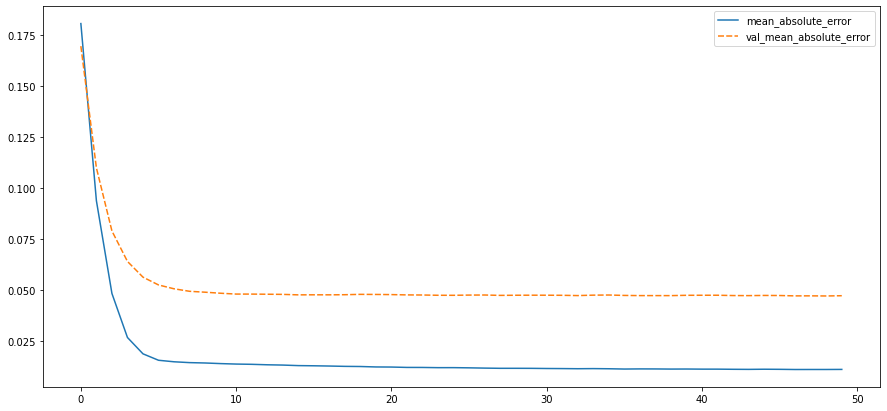

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt



df = pd.DataFrame.from_dict(history.history)
df
df_0 = df[['mean_absolute_error', 'val_mean_absolute_error']]
df_1 = df[['loss', 'val_loss']]
plt.figure(figsize=(15,7))
sb.lineplot(data=df_0);

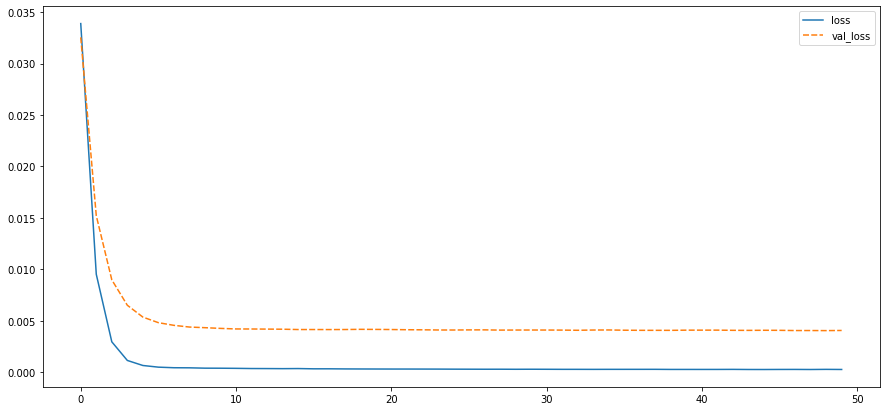

In [7]:
plt.figure(figsize=(15,7))
sb.lineplot(data=df_1);

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

y_pred = lin_model.predict(x_test)

res = metrics.mean_absolute_error(y_test, y_pred).numpy()
print("Mean Absolute Error for Linear Regression Model - ", np.mean(res))



Mean Absolute Error for Linear Regression Model -  0.044662067866462256


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [9]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
model0 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(28, activation="relu"),
    Dense(28,activation="relu"),
    Dense(28,activation="relu"),
    Dense(10,activation="softmax")
])
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history0 = model0.fit(x=x_train, 
        y=y_train, 
        epochs=50, 
        validation_data=(x_test, y_test), 
        callbacks=[tensorboard_callback])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1947 - accuracy: 0.6488 - val_loss: 0.6934 - val_accuracy: 0.7480
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6614 - accuracy: 0.7510 - val_loss: 0.7338 - val_accuracy: 0.7509
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6011 - accuracy: 0.7839 - val_loss: 0.6328 - val_accuracy: 0.7839
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5548 - accuracy: 0.8010 - val_loss: 0.5875 - val_accuracy: 0.7939
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5298 - accuracy: 0.8070 - val_loss: 0.6209 - val_accuracy: 0.7841
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5210 - accuracy: 0.8103 - val_loss: 0.5959 - val_accuracy: 0.7935
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5090 - accuracy: 0.8156 - val_loss: 0.5373 - val_accuracy:

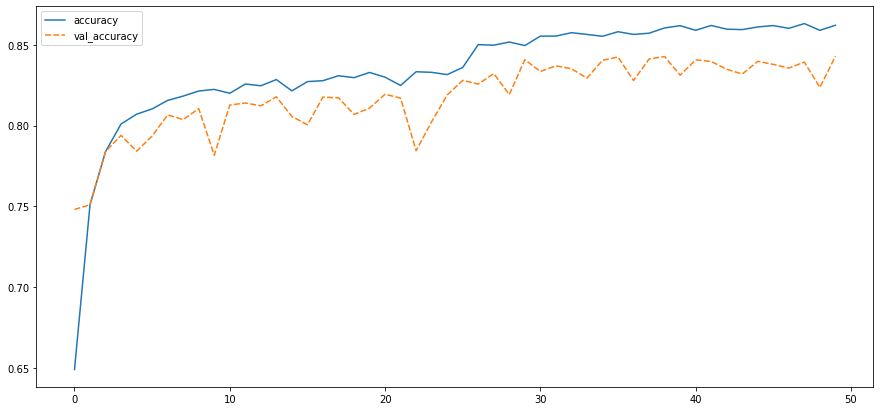

In [13]:
# history0.history
import seaborn as sb
import matplotlib.pyplot as plt



df0 = pd.DataFrame.from_dict(history0.history)
df0_0 = df0[['accuracy', 'val_accuracy']]
df0_1 = df0[['loss', 'val_loss']]
plt.figure(figsize=(15,7))
sb.lineplot(data=df0_0);

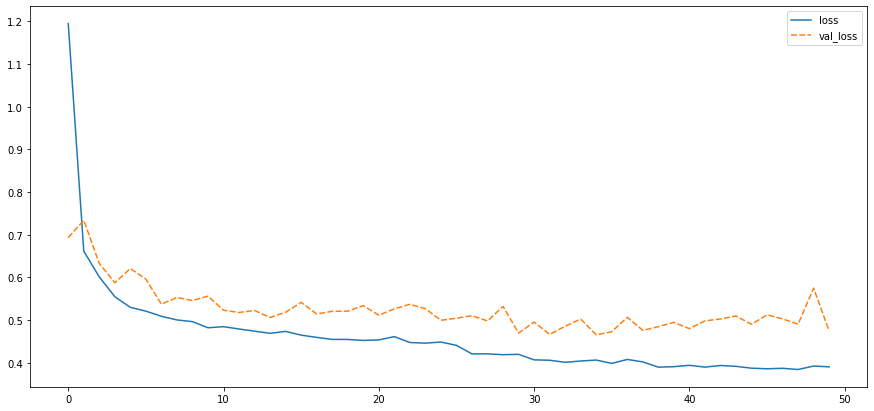

In [14]:
plt.figure(figsize=(15,7))
sb.lineplot(data=df0_1);

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.